In [0]:
!unzip train.zip
!pip install -U scikit-learn

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

**Dataset**

The dataset used for this projects consists of images with 8 different types of Lego bricks.
Each type/class is stored in its own directory under */lego-brick-images/LEGO brick images/train.

Some important observations regarding the images would be that the classes are equally
distributed(only one class has 379 images, the other ones are represented by 400 images
each) and all the images have the height and width equal to 200 pixels.
For more information about the dataset, please use this link:
https://www.kaggle.com/joosthazelzet/lego-brick-images


The code cell bellow reads all the images stored in ./train directory and stores them in x_train and in y_train stores the type of the lego piece read(given by the directory name) as a categorical value.

In [0]:
trainDir='./train'
directories = os.listdir(trainDir)
image_height=200
image_width=200
count = 0;
for i in range(len(directories)):
    for file in os.listdir(trainDir+'/'+directories[i]):
        count+=1
x_train = np.empty(shape=(count,image_height,image_width),)
y_train = np.zeros(count,dtype='int32')
count = 0
label = 0
y_originalNames = {}
for i in range(len(directories)):
    for file in os.listdir(trainDir+'/'+directories[i]):
        image = cv2.imread(trainDir+'/'+directories[i]+'/'+file,0)
        x_train[count] = image
        y_train[count] = label
        y_originalNames[label] = directories[i]
        count+=1
    label+=1
        

Here is an example of a picture.


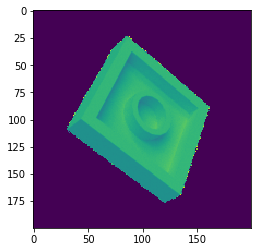

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

The cell bellow generates an array of indexes where the largest value is the number of images - 1. This array will be used in the next cells to shuffle the images, this is needed because x_train contains the images grouped by their labels.

In [5]:
shuffle = np.arange(x_train.shape[0])
np.random.shuffle(shuffle)
print(shuffle)

[ 581 1905 2680 ...  910  520 1780]


In [0]:
x_train = x_train/255.0
train_mean = np.mean(x_train,axis=0) 
x_train-=train_mean

In [7]:
x_train=x_train[shuffle]
y_train = y_train[shuffle]
x_train = x_train.reshape(x_train.shape[0],200,200,1)
import gc
gc.collect()

0

The function below is used to plot the accuracy and the loss values ,during training, for a model on train and validation data.

In [0]:
## this function will be used later to plot the results of the models trainings
def plot(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Accuracies evolution')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss evolution')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

Splitting the initial data into train and test.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2)

Here a "normal"(not bayesian) CNN is built and is trained and then evaluated on the test data, as it can be seen from the values printed.

In [10]:

model = tf.keras.models.Sequential([
  layers.Conv2D(input_shape=(image_height,image_width,1),filters=32, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.Conv2D(filters=32, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  layers.Dropout(0.2),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.Conv2D(filters=64, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.Dropout(0.2),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  layers.Dropout(0.2),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  layers.Flatten(),
  layers.Dropout(0.3),
  layers.Dense(8, activation='softmax')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 64)      0

In [12]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(X_train[:-500], Y_train[:-500],
          epochs=10, batch_size=64, initial_epoch=0,
          validation_data=(X_train[-500:], Y_train[-500:]))


Train on 2043 samples, validate on 500 samples
Epoch 1/10
2043/2043 [==============================] - 13s 6ms/sample - loss: 1.2037 - acc: 0.5580 - val_loss: 0.5692 - val_acc: 0.8260
Epoch 2/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.4680 - acc: 0.8434 - val_loss: 0.2884 - val_acc: 0.9040
Epoch 3/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.2209 - acc: 0.9197 - val_loss: 0.2559 - val_acc: 0.9080
Epoch 4/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.2068 - acc: 0.9325 - val_loss: 0.1825 - val_acc: 0.9420
Epoch 5/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.1366 - acc: 0.9550 - val_loss: 0.2182 - val_acc: 0.9260
Epoch 6/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.0808 - acc: 0.9726 - val_loss: 0.1495 - val_acc: 0.9520
Epoch 7/10
2043/2043 [==============================] - 4s 2ms/sample - loss: 0.0754 - acc: 0.9716 - val_loss: 0.1203 - val_acc: 0.9560


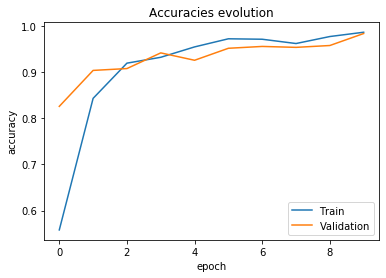

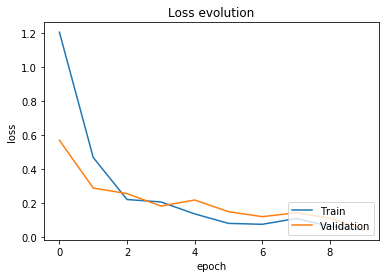

Loss and accuracy on the test data for the classic model: [0.08827115712488222, 0.9779874]


In [13]:
plot(history2)
results = model.evaluate(X_test, Y_test, verbose=0)
print('Loss and accuracy on the test data for the classic model:', results)

Transform the labels in one hot encoding.

In [0]:
y_train_oneHot = tf.keras.utils.to_categorical(Y_train, num_classes=8, dtype='float32')
y_test_oneHot  = tf.keras.utils.to_categorical(Y_test, num_classes=8, dtype='float32')

**Bayesian Neural Network**

In this section a bayesian neural network is built with the same structure as the one above, but (in order to capture the uncertainty in the weights and implicitly in the network responses) DenseFlipout and Convolution2DFlipout layers are used instead of the classical Dense(fully connected layer) and Conv2D layers.

These layers allows the network to learn via Variational Inference. According to the tensorflow probability doc the layers have weights and biases  sampled from a distribution (the prior distribution is the standard normal distribution) when images are passed into the network(forward pass) and this allows the network to learn a whole distribution for its weights instead of some fix values as it is the case in the classical neural nets.

The next cell defines a placeholder for the features where will be added the batches from X_train and a placeholder where the batches of labels will be added in the one hot encoding form. After that, the bayesian neural network is built.

In [0]:
import tensorflow_probability as tfp
BATCH_SIZE = 64
EPOCHS = 70
features = tf.placeholder(dtype = tf.float32,shape = [None,image_height,image_width,1])
labels = tf.placeholder(dtype = tf.float32, shape = [None,8])
model = tf.keras.Sequential([tf.keras.layers.Input(shape=x_train.shape[1:]),
                             layers.Conv2D(filters=32, kernel_size=3, activation='relu', strides=1, padding='same'),
  tfp.layers.Convolution2DFlipout(filters=32, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  tfp.layers.Convolution2DFlipout(filters=64, kernel_size=3, activation='relu', strides=1, padding='same'),
  tfp.layers.Convolution2DFlipout(filters=64, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  tfp.layers.Convolution2DFlipout(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  tfp.layers.Convolution2DFlipout(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  tfp.layers.Convolution2DFlipout(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  tfp.layers.Convolution2DFlipout(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
  layers.MaxPool2D(pool_size=2, strides=(2,2), padding='same'),
  layers.Flatten(),
  tfp.layers.DenseFlipout(8)])

In the next cell:
 

*   the negative expected lower bound function is created to be minimized and to allow the model to be trained via variational inference. The elbo is given by a value which measures how likely is to obtain the true labels from a Categorical distribution which was created using the values computed by the network(negLogLikelihood in code) + kl divergences between the priors of the weights and their variational posteriors(kl in code).
*   The train operation is created using the Adam optimizer.

*  An operation which updates the accuracy is created
*  Finally, the initialization operation is created.










In [0]:
logits = model(features)
labels_distribution = tfp.distributions.Categorical(logits=logits)
negLogLikelihood = -tf.reduce_mean(labels_distribution.log_prob(tf.argmax(labels, axis=-1))) 
kl = sum(model.losses) 
elboLoss = negLogLikelihood + (kl/X_train.shape[0])
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
trainOp = optimizer.minimize(elboLoss,var_list=model.trainable_variables)
predictions = tf.argmax(tf.nn.softmax(logits), axis=-1)
accuracy, accuracyOp = tf.metrics.accuracy(labels=tf.argmax(labels,axis=-1), predictions=predictions)
init_op = tf.group(tf.global_variables_initializer(),
                     tf.local_variables_initializer())

Next, a tensorflow session is created and the train and accuracy operations are executed for every batch. After every epoch the accuracy and the elbo values are shown.

After the training process is done, under the same session, the test data is evaluated by the network for 50 times and with the values obtained a distribution of probabilities is created, using the softmax function. So, for every image in the test data we have 50 arrays of probabilities. 

From these 50 vectors of probability the mean and standard deviations are computed for further evaluations.(meanProbs and stdProbs)

In [30]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(EPOCHS):
        for j in range(0,X_train.shape[0],BATCH_SIZE):
            x_batch = X_train[j:j+BATCH_SIZE]
            y_batch = y_train_oneHot[j:j+BATCH_SIZE]
            sess.run([trainOp,accuracyOp], feed_dict={
                   features: x_batch,labels: y_batch})

        loss_value, accuracy_value = sess.run([elboLoss, accuracy], feed_dict={features: x_batch,
labels: y_batch})
        print("===============")
        print("Epoch: ",i)
        print("Loss: ",loss_value)
        print("Accuracy: ",accuracy_value)
    probs = np.asarray([sess.run((tf.nn.softmax(logits)),
                                     feed_dict={features: X_test, labels:y_test_oneHot})
                            for _ in range(50)])
    meanProbs = np.mean(probs,axis=0)
    stdProbs = np.std(probs,axis=0)

Epoch:  0
Loss:  751.93274
Accuracy:  0.16712545
Epoch:  1
Loss:  748.7696
Accuracy:  0.17361385
Epoch:  2
Loss:  746.0328
Accuracy:  0.18560755
Epoch:  3
Loss:  742.7413
Accuracy:  0.21470703
Epoch:  4
Loss:  739.0358
Accuracy:  0.24860401
Epoch:  5
Loss:  735.46594
Accuracy:  0.28614497
Epoch:  6
Loss:  731.617
Accuracy:  0.3238582
Epoch:  7
Loss:  727.5302
Accuracy:  0.36069602
Epoch:  8
Loss:  723.50415
Accuracy:  0.39362958
Epoch:  9
Loss:  718.89404
Accuracy:  0.42622885
Epoch:  10
Loss:  714.6588
Accuracy:  0.45272228
Epoch:  11
Loss:  709.96906
Accuracy:  0.47774938
Epoch:  12
Loss:  705.29376
Accuracy:  0.50025713
Epoch:  13
Loss:  700.70337
Accuracy:  0.5212628
Epoch:  14
Loss:  695.8247
Accuracy:  0.5404902
Epoch:  15
Loss:  690.80206
Accuracy:  0.5573388
Epoch:  16
Loss:  685.33484
Accuracy:  0.57313037
Epoch:  17
Loss:  679.9797
Accuracy:  0.5874295
Epoch:  18
Loss:  674.8046
Accuracy:  0.600327
Epoch:  19
Loss:  669.43164
Accuracy:  0.6120527
Epoch:  20
Loss:  664.02795
A

The code bellow decides for every image if the network is certain of its prediction or not(considering the prediction the index of the largest probability). This is done by checking if the largest probability for a label exceeds a certain threshold. If it does it is considered certain, if it does not then it is considered uncertain.

After that, the confusion matrix and the accuracy are computed separately for the set of images which were previously labeled as certain and for the uncertain ones.

The results are saying that when the network is certain about a class of an image, most probably it is right.

In [31]:
uncertaintyThreshold = 0.65
from sklearn.metrics import accuracy_score
preds = [np.max(meanProbability)>=uncertaintyThreshold for meanProbability in meanProbs]
preds = np.array(preds)

certainPredictions = np.where(preds)[0]
print('Number of recognizable samples:', sum(preds))

uncertainPredictions = np.where(preds == False)[0]
print('Unrecognizable samples:', uncertainPredictions)

print('Test accuracy on recognizable samples:',
    accuracy_score(Y_test[certainPredictions], np.argmax(meanProbs[certainPredictions], axis=1)))
matrix = confusion_matrix(Y_test[certainPredictions], np.argmax(meanProbs[certainPredictions], axis=1))
print('Confusion matrix on recognizable data:\n',matrix)
print('Test accuracy on unrecognizable samples:',
     accuracy_score(Y_test[uncertainPredictions], np.argmax(meanProbs[uncertainPredictions], axis=1)))
matrix = confusion_matrix(Y_test[uncertainPredictions], np.argmax(meanProbs[uncertainPredictions], axis=1))
print('Confusion matrix on unrecognizable data:\n',matrix)

Number of recognizable samples: 561
Unrecognizable samples: [  3   4   5  14  23  28  56  66  69  81  85  88 107 109 117 124 128 132
 149 155 169 182 193 198 217 221 235 240 241 246 291 292 293 308 315 317
 321 323 324 347 349 356 358 373 378 381 384 394 396 406 427 429 441 446
 458 459 476 480 483 503 508 511 514 519 526 528 530 531 537 539 597 611
 617 619 626]
Test accuracy on recognizable samples: 0.9875222816399287
Confusion matrix on recognizable data:
 [[59  0  0  0  0  0  0  0]
 [ 0 64  0  4  0  0  0  0]
 [ 0  0 61  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  1]
 [ 0  0  0  0 60  0  1  0]
 [ 0  0  0  0  0 84  0  0]
 [ 0  1  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 68]]
Test accuracy on unrecognizable samples: 0.64
Confusion matrix on unrecognizable data:
 [[15  0  0  0  2  1  0  0]
 [ 1  7  0  2  0  0  3  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  1]
 [ 7  0  0  0 11  0  3  0]
 [ 0  2  0  0  0  2  0  0]
 [ 1  3  0  0  0  1  9  0]
 [ 0  0  0  0  0  0  0  0]]


Lets see next, the values of standard deviations for uncertain and certain predictions.

From the results we can conclude that we can use the standard deviation as a measure of uncertainty of the model(when standard deviation is large then the uncertainty of the network is large)


In [42]:
for i in range(10):
  print('Standard deviation of an uncertain prediction:',stdProbs[uncertainPredictions][i][np.argmax(meanProbs[uncertainPredictions][i])])
  print('Standard deviation of a certain prediction:',stdProbs[certainPredictions][i][np.argmax(meanProbs[uncertainPredictions][i])])


Standard deviation of an uncertain prediction: 0.29890522
Standard deviation of a certain prediction: 0.0055300193
Standard deviation of an uncertain prediction: 0.37263903
Standard deviation of a certain prediction: 1.7803295e-05
Standard deviation of an uncertain prediction: 0.34222597
Standard deviation of a certain prediction: 5.5358887e-05
Standard deviation of an uncertain prediction: 0.33616707
Standard deviation of a certain prediction: 2.6584265e-05
Standard deviation of an uncertain prediction: 0.34533724
Standard deviation of a certain prediction: 1.4980225e-05
Standard deviation of an uncertain prediction: 0.35370767
Standard deviation of a certain prediction: 0.16962945
Standard deviation of an uncertain prediction: 0.34182045
Standard deviation of a certain prediction: 0.009477791
Standard deviation of an uncertain prediction: 0.332996
Standard deviation of a certain prediction: 3.0293377e-05
Standard deviation of an uncertain prediction: 0.35143185
Standard deviation of 